In [1]:
import pandas as pd
import numpy as np
import random

from scipy.stats  import norm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import xgboost as xg

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("houseprice(train).csv")
test=pd.read_csv("houseprice(test).csv")

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
full=pd.DataFrame()
medium=pd.DataFrame()
remove=pd.DataFrame()

feature=train.columns

for i in feature:
    if train[i].count()== len(train):
        full[i]=train[i]
    elif train[i].count() > len(train)*0.5:
        medium[i]=train[i]
    else:
        remove[i]=train[i]

In [8]:
full.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [9]:
medium.isna().sum()

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [10]:
remove.isna().sum()

Alley          1369
MasVnrType      872
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [11]:
numerical=[i  for i in train.columns if train[i].dtype != "O"]
numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
train[numerical].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
print(len(train.select_dtypes(include=['number']).columns))

38


In [14]:
print(len(train.select_dtypes(include=["number"]).columns))

38


In [15]:
train.describe(include="number")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
train.describe(exclude="object")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
train.describe(include="O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [18]:
print(len(train.select_dtypes(include="object").columns))

43


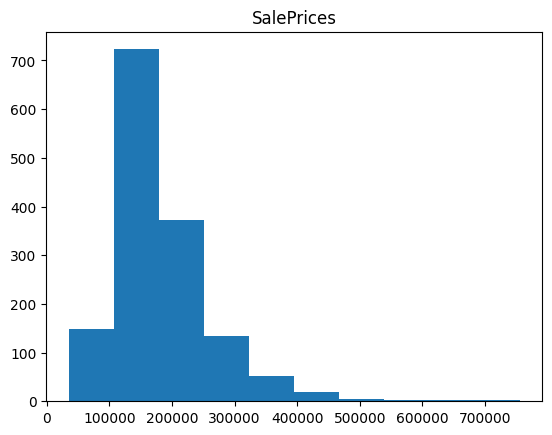

In [19]:
plt.hist(train["SalePrice"])
plt.title("SalePrices")
plt.show()

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
train.drop("Id",axis=1,inplace=True)

In [22]:
train.drop(remove,axis=1,inplace=True)

In [23]:
numerical_data=train.select_dtypes(include="number")

In [24]:
categorical_data=train.select_dtypes(include="object")

In [25]:
feature_zero_ratio = {feature:numerical_data.loc[numerical_data[feature] == 0, feature].count() / 1460 for feature in numerical_data.columns.values}

In [26]:
feature_zero_ratio

{'MSSubClass': 0.0,
 'LotFrontage': 0.0,
 'LotArea': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'MasVnrArea': 0.5897260273972603,
 'BsmtFinSF1': 0.3198630136986301,
 'BsmtFinSF2': 0.8856164383561644,
 'BsmtUnfSF': 0.08082191780821918,
 'TotalBsmtSF': 0.025342465753424658,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.5678082191780822,
 'LowQualFinSF': 0.9821917808219178,
 'GrLivArea': 0.0,
 'BsmtFullBath': 0.5863013698630137,
 'BsmtHalfBath': 0.9438356164383561,
 'FullBath': 0.0061643835616438354,
 'HalfBath': 0.6253424657534247,
 'BedroomAbvGr': 0.00410958904109589,
 'KitchenAbvGr': 0.0006849315068493151,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.4726027397260274,
 'GarageYrBlt': 0.0,
 'GarageCars': 0.05547945205479452,
 'GarageArea': 0.05547945205479452,
 'WoodDeckSF': 0.5212328767123288,
 'OpenPorchSF': 0.44931506849315067,
 'EnclosedPorch': 0.8575342465753425,
 '3SsnPorch': 0.9835616438356164,
 'ScreenPorch': 0.9205479452054794,
 'PoolArea': 0.99520547

In [27]:
numerical_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [28]:
numerical_data.isna().mean()

MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float64

In [29]:
numerical_data.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [30]:
for i in numerical_data:
    if feature_zero_ratio[i] >0.30:
        numerical_data=numerical_data.drop(i,axis=1)
        train.drop([i],axis=1,inplace=True)
        if i in medium:
            medium.drop([i],axis=1,inplace=True)

In [31]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,548,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2,460,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,608,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3,642,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3,836,TA,TA,Y,12,2008,WD,Normal,250000


In [32]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
FireplaceQu      690
GarageType        81
GarageYrBlt  

In [33]:
numerical_data.isna().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
GarageYrBlt      81
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [34]:
numerical_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [35]:
len(numerical_data.columns)

21

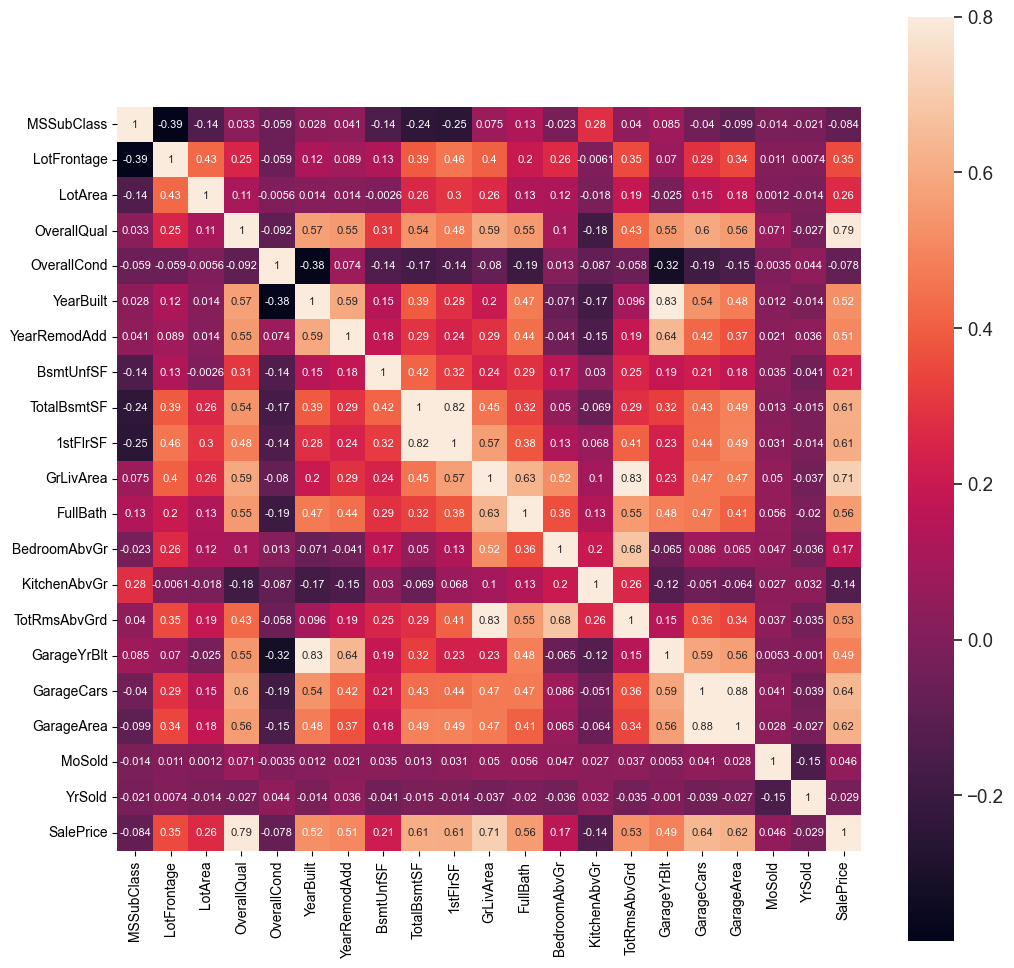

In [36]:
corr=numerical_data.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.set(font_scale=1.23)
sns.heatmap(corr,annot=True,square=True,annot_kws={"size":8},vmax=0.8)
plt.show()

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt']


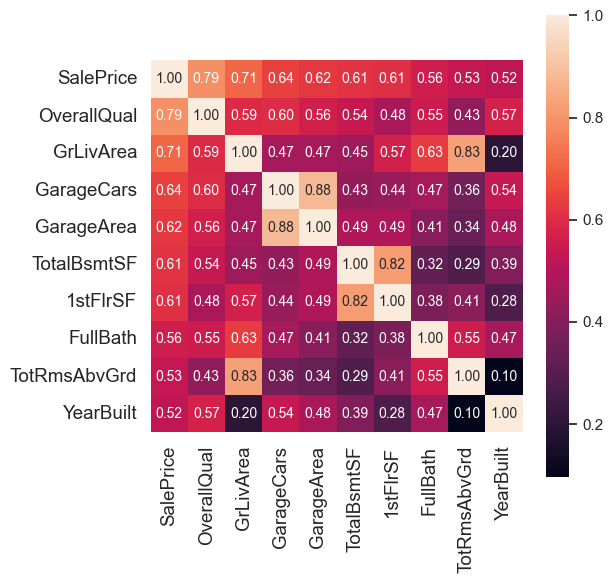

In [37]:
n = 10
most_largest_features = corr.nlargest(n, 'SalePrice')['SalePrice'].index
zoomed_corrmat = np.corrcoef(numerical_data[most_largest_features].values.T)
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1)
sns.heatmap(zoomed_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=most_largest_features.values, xticklabels=most_largest_features.values)
print(most_largest_features.values)

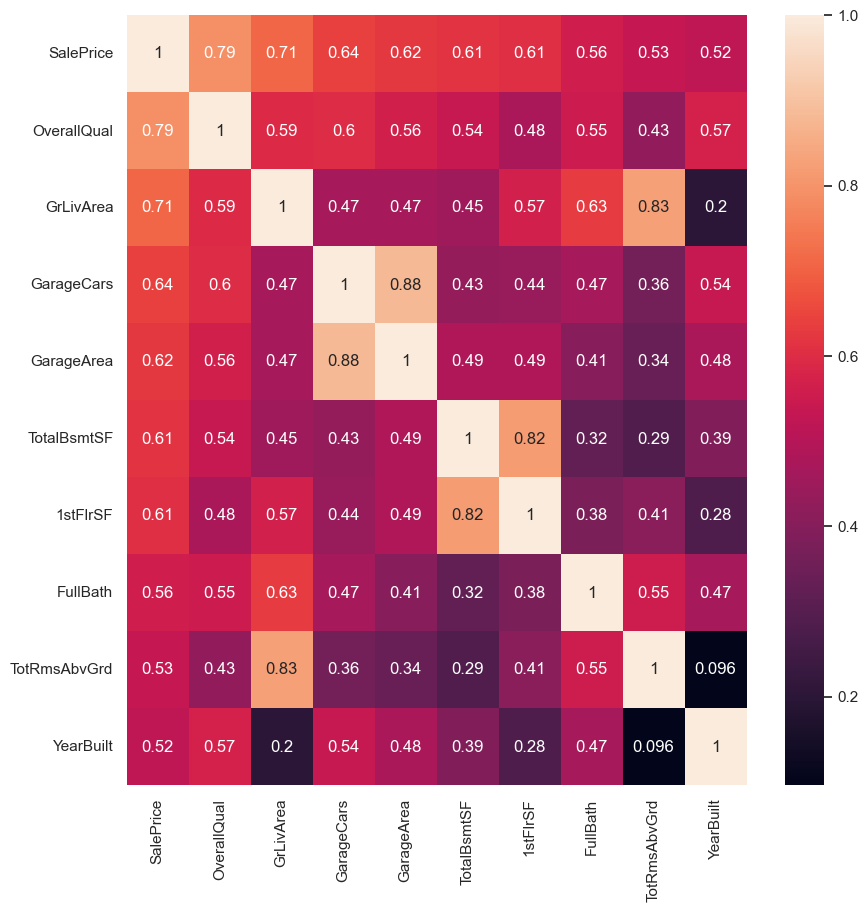

In [38]:
n=10
e=corr.nlargest(n,"SalePrice")['SalePrice'].index
zomm=np.corrcoef(numerical_data[e].values.T)

plt.figure(figsize=(10,10))

sns.heatmap(zomm,annot=True,xticklabels=e.values,yticklabels=e.values)
plt.show()

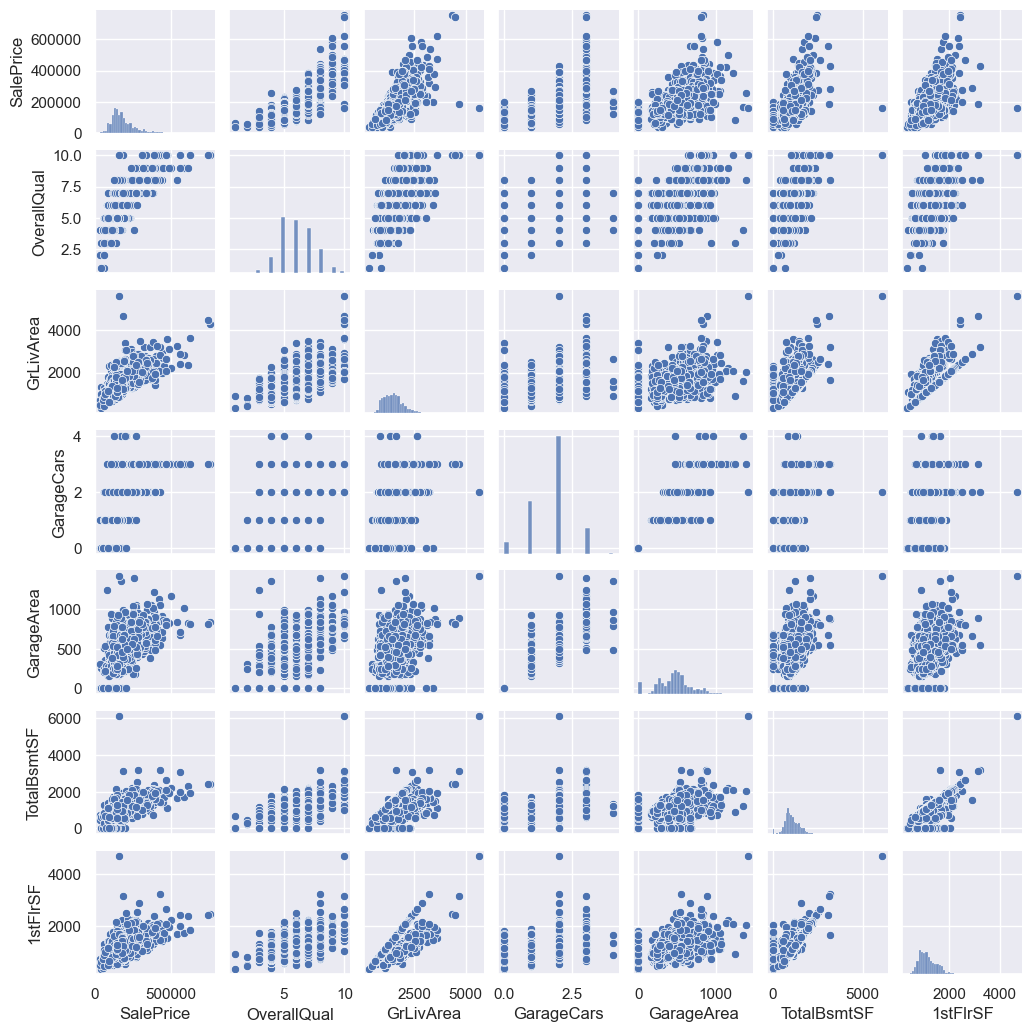

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')


In [39]:
sns.set()
most_largest_features=corr.nlargest(7,"SalePrice")["SalePrice"].index
sns.pairplot(numerical_data[most_largest_features],size=1.5)
plt.show()
print(most_largest_features)

In [40]:
numerical_data.drop(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageYrBlt'],axis=1,inplace=True)
train.drop(['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageYrBlt'],axis=1,inplace=True)

In [41]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,RFn,2,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,RFn,2,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,RFn,2,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Unf,3,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,RFn,3,TA,TA,Y,12,2008,WD,Normal,250000


In [42]:
corr=numerical_data.corr()
corr.sort_values(by="SalePrice",ascending=False,inplace=True)
corr["SalePrice"]


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
LotFrontage     0.351799
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
MoSold          0.046432
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

In [43]:
numerical_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [44]:
numerical_have_missing = pd.DataFrame()
categorical_have_missing = pd.DataFrame()

# Numerical
for feature in numerical_data.columns.values:
    if feature in medium:
        numerical_have_missing[feature] = numerical_data[feature]
      
        

In [45]:
numerical_have_missing

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


In [46]:
for feature in categorical_data.columns.values:
    if feature in medium:
        categorical_have_missing[feature] = categorical_data[feature]

In [47]:
categorical_have_missing

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA
1456,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA
1457,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
1458,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA


In [48]:
print("numerical missing values")
numerical_have_missing.info()

numerical missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


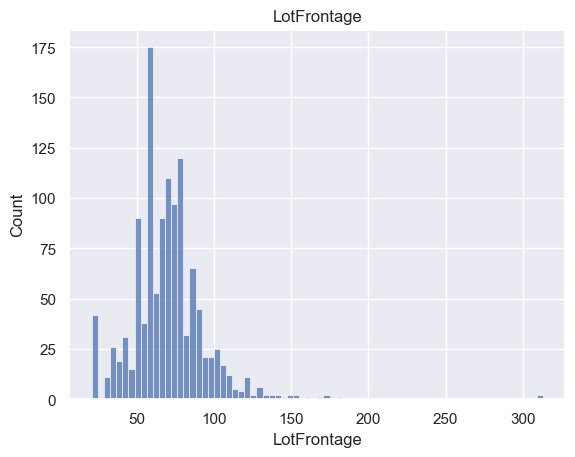

In [49]:
sns.histplot(numerical_data["LotFrontage"])
plt.title("LotFrontage")
plt.show()

In [50]:
old_LotFrontage = list(numerical_have_missing['LotFrontage'].values)
missing_indices = list(numerical_have_missing.loc[numerical_have_missing['LotFrontage'].isnull(), 'LotFrontage'].index)

random_values = [random.randint(60, 80) for _ in range( 1460 - numerical_have_missing['LotFrontage'].count() ) ]
random_values_idx = 0

for missing_idx in missing_indices:
        
    old_LotFrontage[missing_idx] = random_values[random_values_idx]
    random_values_idx += 1
        

numerical_have_missing['LotFrontage'] = pd.Series(old_LotFrontage)
train['LotFrontage'] = pd.Series(old_LotFrontage)

print(numerical_have_missing['LotFrontage'].count())
print(train['LotFrontage'].count())

1460
1460


In [51]:
print(len(categorical_have_missing.columns.values))
print('-'*30)
print(categorical_have_missing.columns.values)
print('-'*30)
print(categorical_have_missing.count())

11
------------------------------
['BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Electrical' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond']
------------------------------
BsmtQual        1423
BsmtCond        1423
BsmtExposure    1422
BsmtFinType1    1423
BsmtFinType2    1422
Electrical      1459
FireplaceQu      770
GarageType      1379
GarageFinish    1379
GarageQual      1379
GarageCond      1379
dtype: int64


In [52]:
train = train.drop(['FireplaceQu'], axis=1)
categorical_have_missing = categorical_have_missing.drop(['FireplaceQu'], axis=1)

In [53]:
categorical_have_missing.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [54]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
train[categorical_have_missing.columns] = imputer.fit_transform(train[categorical_have_missing.columns])

In [55]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtUnfSF        0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
MoSold           0
YrSold           0
SaleType         0
SaleConditio

In [56]:
categorical_have_missing[categorical_have_missing.columns]=imputer.fit_transform(categorical_have_missing[categorical_have_missing.columns])

In [57]:
categorical_have_missing.isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [58]:
s=numerical_data.corr()
s["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
LotFrontage     0.351799
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
MoSold          0.046432
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

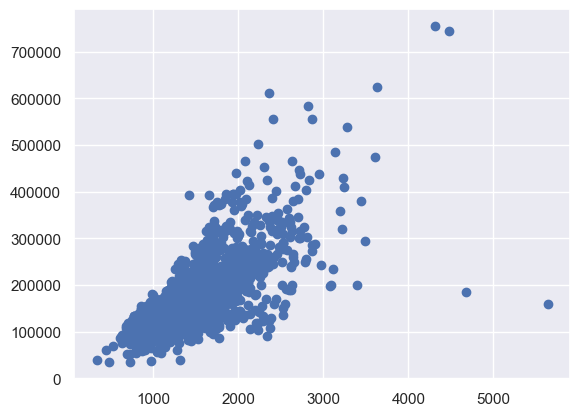

In [59]:
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.show()

In [60]:
outlier=train.loc[(train["GrLivArea"]>4000)  & (train["SalePrice"]<200000)]["GrLivArea"]

In [61]:
outlier

523     4676
1298    5642
Name: GrLivArea, dtype: int64

In [62]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,RFn,2,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,RFn,2,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,RFn,2,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Unf,3,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,RFn,3,TA,TA,Y,12,2008,WD,Normal,250000


In [63]:
train.drop([523,1298],axis=0,inplace=True)

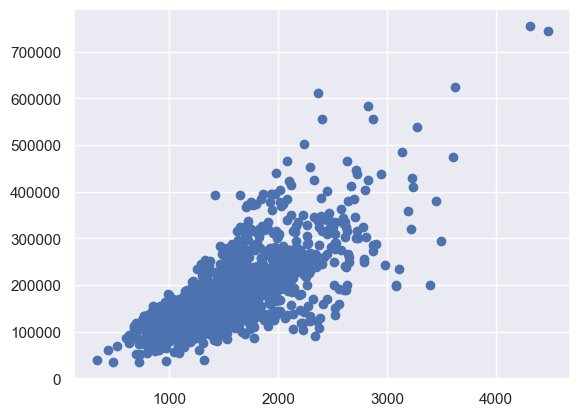

In [64]:
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.show()

In [65]:
test = test[train.drop(['SalePrice'], axis=1).columns.values]

In [66]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Attchd,Unf,1.0,TA,TA,Y,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Attchd,Unf,1.0,TA,TA,Y,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Attchd,Fin,2.0,TA,TA,Y,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Attchd,Fin,2.0,TA,TA,Y,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Attchd,RFn,2.0,TA,TA,Y,1,2010,WD,Normal


In [67]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,RFn,2,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,RFn,2,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,RFn,2,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Unf,3,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,RFn,3,TA,TA,Y,12,2008,WD,Normal,250000


In [68]:
train=pd.get_dummies(train,dtype=int)

In [69]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,150,1710,2,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,284,1262,2,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,434,1786,2,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,540,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,490,2198,2,...,0,0,0,1,0,0,0,0,1,0


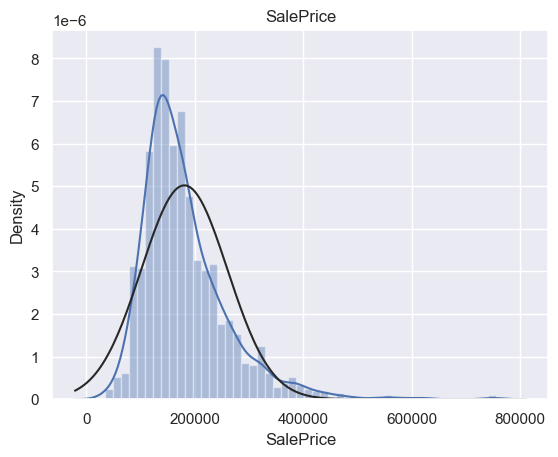

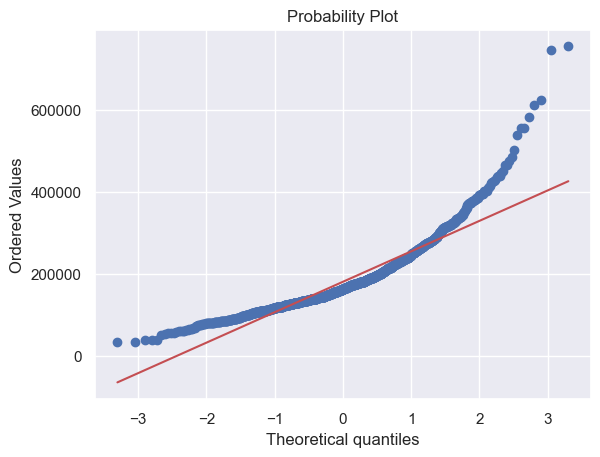

In [70]:
sns.distplot(train["SalePrice"],fit=norm)
plt.title("SalePrice")
plt.show()

res=stats.probplot(train["SalePrice"],plot=plt)

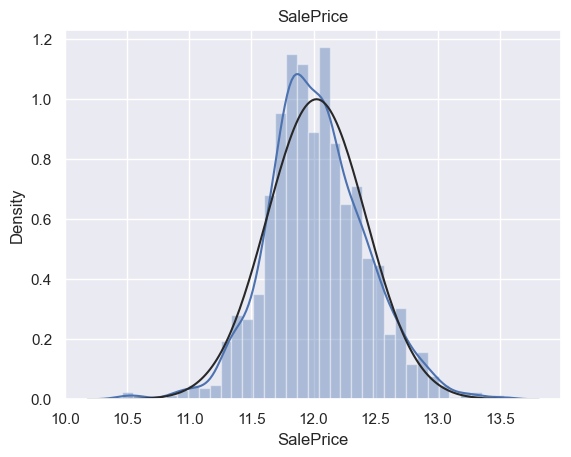

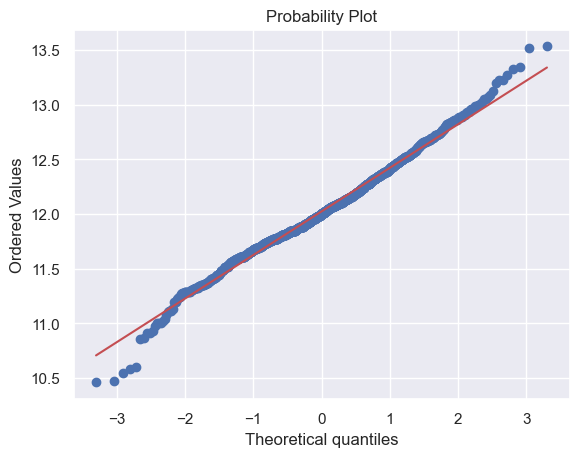

In [71]:
train["SalePrice"]=np.log(train["SalePrice"])

sns.distplot(train["SalePrice"],fit=norm)
plt.title("SalePrice")
plt.show()

res=stats.probplot(train["SalePrice"],plot=plt)

In [72]:
train["GrLivArea"]

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1458, dtype: int64

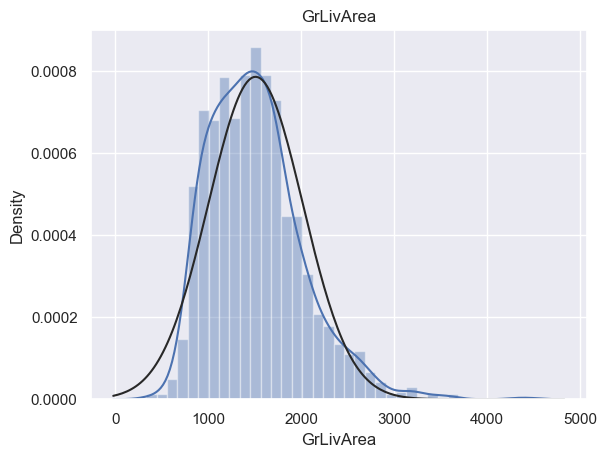

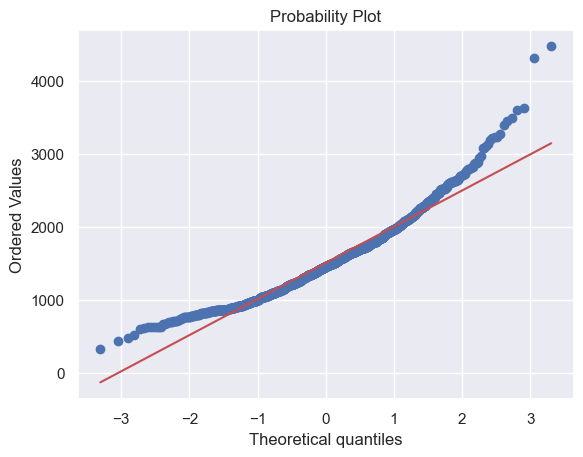

In [73]:
sns.distplot(train["GrLivArea"],fit=norm)
plt.title("GrLivArea")
plt.show()

d=stats.probplot(train["GrLivArea"],plot=plt)

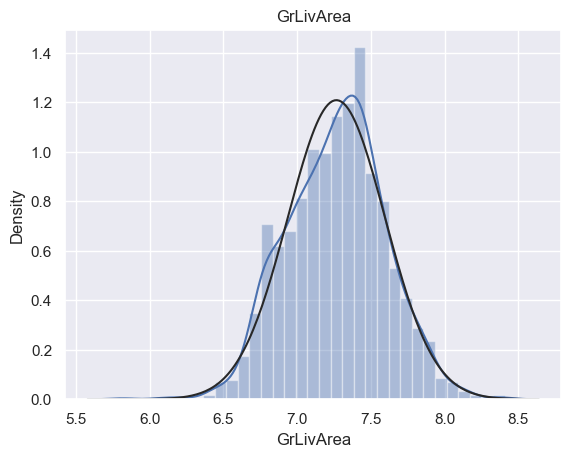

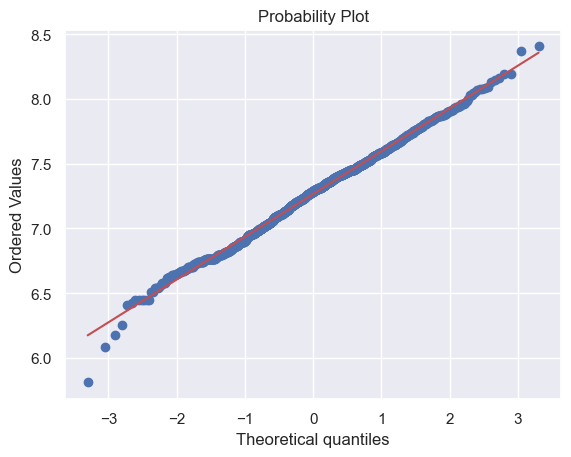

In [74]:
train["GrLivArea"]=np.log(train["GrLivArea"])

sns.distplot(train["GrLivArea"],fit=norm)
plt.title("GrLivArea")
plt.show()

d=stats.probplot(train["GrLivArea"],plot=plt)

In [75]:
train.shape

(1458, 246)

In [76]:
X=train.drop(["SalePrice"],axis=1)
y=train["SalePrice"]

In [77]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
print(model.score(X,y))
print(mean_squared_error(y,y_pred))

0.9411526617473859
0.009395732980064594


In [78]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y,y_pred))

0.007530198708895671

In [79]:
forest=RandomForestRegressor()
forest.fit(X,y)
y_pred=forest.predict(X)
print(forest.score(X,y))
np.sqrt(mean_squared_log_error(y_pred,y))

0.9829749387172666


0.004069195156056273

In [80]:
from sklearn.tree import DecisionTreeRegressor
s=DecisionTreeRegressor()
s.fit(X,y)
y_pred=s.predict(X)
print(s.score(X,y))
np.sqrt(mean_squared_log_error(y_pred,y))

1.0


0.0

In [81]:
xg_reg = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 300, seed = 123)
xg_reg.fit(X, y)
pred = xg_reg.predict(X)
print(xg_reg.score(X, y))
np.sqrt(mean_squared_log_error(pred, y))

0.999987462434629


0.00010865546829418247

In [82]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Attchd,Unf,1.0,TA,TA,Y,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Attchd,Unf,1.0,TA,TA,Y,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Attchd,Fin,2.0,TA,TA,Y,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Attchd,Fin,2.0,TA,TA,Y,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Attchd,RFn,2.0,TA,TA,Y,1,2010,WD,Normal


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

<Axes: xlabel='LotFrontage', ylabel='Count'>

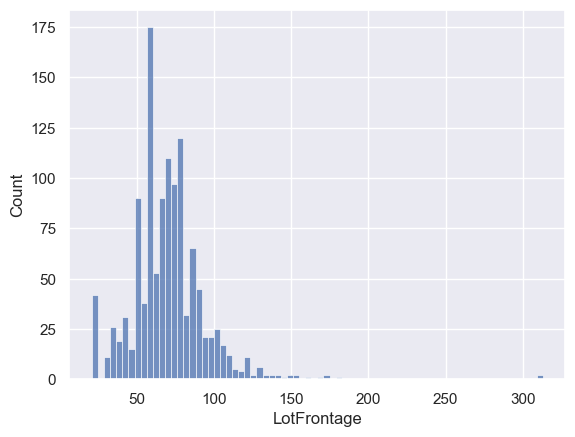

In [84]:
sns.histplot(numerical_data["LotFrontage"])

In [85]:
old_LotFrontage=list[test["LotFrontage"].values]

In [86]:
old_LotFrontage

list[array([ 80.,  81.,  74., ..., 160.,  62.,  74.])]

In [87]:
missing_indices=list(test.loc[test["LotFrontage"].isna(),"LotFrontage"].index)


In [88]:
missing_indices

[6,
 40,
 41,
 45,
 47,
 52,
 59,
 75,
 82,
 98,
 103,
 105,
 107,
 113,
 119,
 124,
 132,
 146,
 152,
 167,
 174,
 177,
 179,
 182,
 183,
 184,
 187,
 188,
 199,
 229,
 230,
 231,
 235,
 238,
 240,
 268,
 271,
 272,
 273,
 274,
 276,
 277,
 279,
 280,
 283,
 286,
 290,
 294,
 297,
 298,
 301,
 308,
 359,
 363,
 373,
 380,
 383,
 386,
 387,
 388,
 401,
 402,
 403,
 412,
 418,
 421,
 423,
 425,
 442,
 450,
 451,
 462,
 476,
 481,
 485,
 487,
 489,
 495,
 497,
 524,
 525,
 528,
 529,
 532,
 536,
 539,
 563,
 569,
 570,
 579,
 581,
 582,
 584,
 589,
 592,
 604,
 614,
 650,
 651,
 662,
 668,
 671,
 677,
 680,
 681,
 682,
 686,
 688,
 695,
 697,
 703,
 704,
 706,
 707,
 710,
 711,
 713,
 714,
 715,
 718,
 726,
 742,
 743,
 744,
 762,
 763,
 774,
 781,
 785,
 790,
 793,
 794,
 797,
 798,
 808,
 819,
 840,
 860,
 865,
 867,
 897,
 901,
 912,
 919,
 927,
 929,
 935,
 936,
 943,
 961,
 963,
 971,
 986,
 999,
 1006,
 1020,
 1023,
 1024,
 1030,
 1031,
 1032,
 1033,
 1038,
 1052,
 1054,
 1061,
 10

In [89]:
random_values=[random.randint(60,80)  for i in range(len(test)-test["LotFrontage"].count())]

In [90]:
random_values

[77,
 78,
 66,
 73,
 69,
 62,
 63,
 75,
 60,
 67,
 60,
 75,
 62,
 65,
 76,
 60,
 69,
 78,
 63,
 76,
 80,
 71,
 70,
 64,
 75,
 76,
 66,
 64,
 72,
 65,
 72,
 65,
 64,
 71,
 63,
 74,
 75,
 78,
 63,
 75,
 75,
 74,
 60,
 65,
 79,
 71,
 77,
 67,
 75,
 69,
 64,
 67,
 62,
 66,
 66,
 76,
 72,
 70,
 60,
 64,
 64,
 72,
 69,
 74,
 73,
 67,
 66,
 74,
 74,
 77,
 75,
 76,
 62,
 72,
 75,
 65,
 70,
 60,
 65,
 70,
 63,
 78,
 66,
 79,
 72,
 75,
 66,
 75,
 62,
 70,
 72,
 70,
 68,
 80,
 60,
 78,
 78,
 76,
 78,
 74,
 65,
 69,
 65,
 66,
 72,
 70,
 75,
 62,
 80,
 76,
 75,
 61,
 72,
 72,
 71,
 77,
 61,
 79,
 80,
 62,
 60,
 79,
 63,
 76,
 80,
 71,
 60,
 69,
 62,
 69,
 60,
 78,
 73,
 75,
 79,
 75,
 72,
 60,
 61,
 66,
 78,
 77,
 80,
 72,
 80,
 77,
 65,
 66,
 73,
 75,
 71,
 62,
 74,
 70,
 68,
 80,
 72,
 63,
 78,
 65,
 69,
 79,
 64,
 80,
 72,
 78,
 72,
 76,
 71,
 72,
 78,
 74,
 62,
 78,
 75,
 76,
 71,
 76,
 80,
 78,
 60,
 62,
 80,
 70,
 65,
 73,
 75,
 74,
 61,
 64,
 71,
 62,
 63,
 60,
 63,
 76,
 74,
 78,
 74,
 70,


In [91]:
old_LotFrontage = list(test['LotFrontage'].values)
missing_indices = list(test.loc[test['LotFrontage'].isnull(), 'LotFrontage'].index)
random_values = [random.randint(60, 80) for _ in range( 1460 - test['LotFrontage'].count() ) ]
random_values_idx = 0

for missing_idx in missing_indices:
        
    old_LotFrontage[missing_idx] = random_values[random_values_idx]
    random_values_idx += 1
        

test['LotFrontage'] = pd.Series(old_LotFrontage)
print(test['LotFrontage'].count())

1459


In [92]:
d=test.drop(["LotFrontage"],axis=1)
d=d.columns
imputer=SimpleImputer(strategy="most_frequent")

test[d]=imputer.fit_transform(test[d])

In [93]:
test=pd.get_dummies(test,dtype=int)

In [94]:
test.isna().sum().max()

0

In [95]:
test.head()

,LotFrontage,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 3245 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(1), int32(3244)
memory usage: 18.1 MB


In [98]:
rest = set(X.columns.values) - set(list(test.columns.values))
for feature in list(rest):
    test[feature] = 0

In [99]:
test.head()

,LotFrontage,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,...,Condition2_RRAn,BedroomAbvGr,Heating_Floor,RoofMatl_Roll,Utilities_NoSeWa,KitchenAbvGr,LotArea,Exterior2nd_Other,Heating_OthW,GrLivArea
0,80.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,81.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,74.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
rest

{'BedroomAbvGr',
 'BsmtUnfSF',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'FullBath',
 'GarageCars',
 'GarageQual_Ex',
 'GrLivArea',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'KitchenAbvGr',
 'LotArea',
 'MSSubClass',
 'MoSold',
 'OverallCond',
 'OverallQual',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'TotRmsAbvGrd',
 'Utilities_NoSeWa',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}